In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Read data from CSV file
data = pd.read_csv('monthly_average_values.csv')  

In [33]:
# Set the style for the plots
plt.style.use('seaborn-darkgrid')

C:\Users\owner\AppData\Local\Temp\ipykernel_20748\958207326.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [34]:
# Get unique types of measurements
types = data['type'].unique()

In [35]:
# Define the plotting function
def plot_measurement(data, measurement_type):
    subset = data[data['type'] == measurement_type]
    plt.figure(figsize=(12, 6))
    plt.plot(subset['year'].astype(str) + '-' + subset['month'].astype(str), subset['value'], marker='o')
    plt.title(f'Average {measurement_type} Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

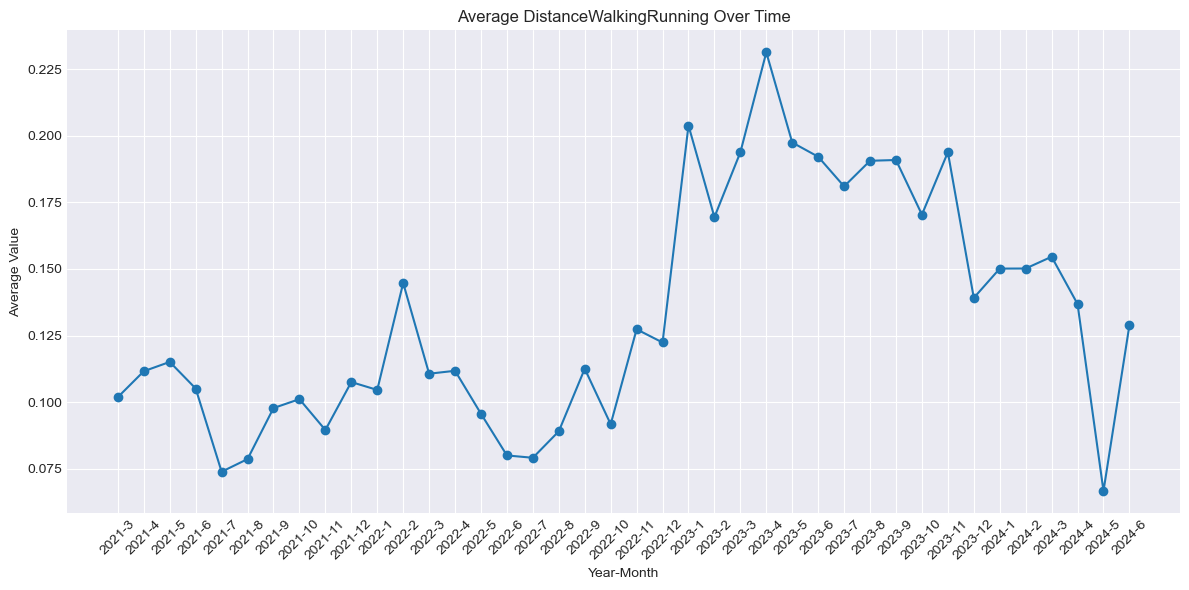

In [36]:
# Plot for DistanceWalkingRunning
plot_measurement(data, 'DistanceWalkingRunning')
  

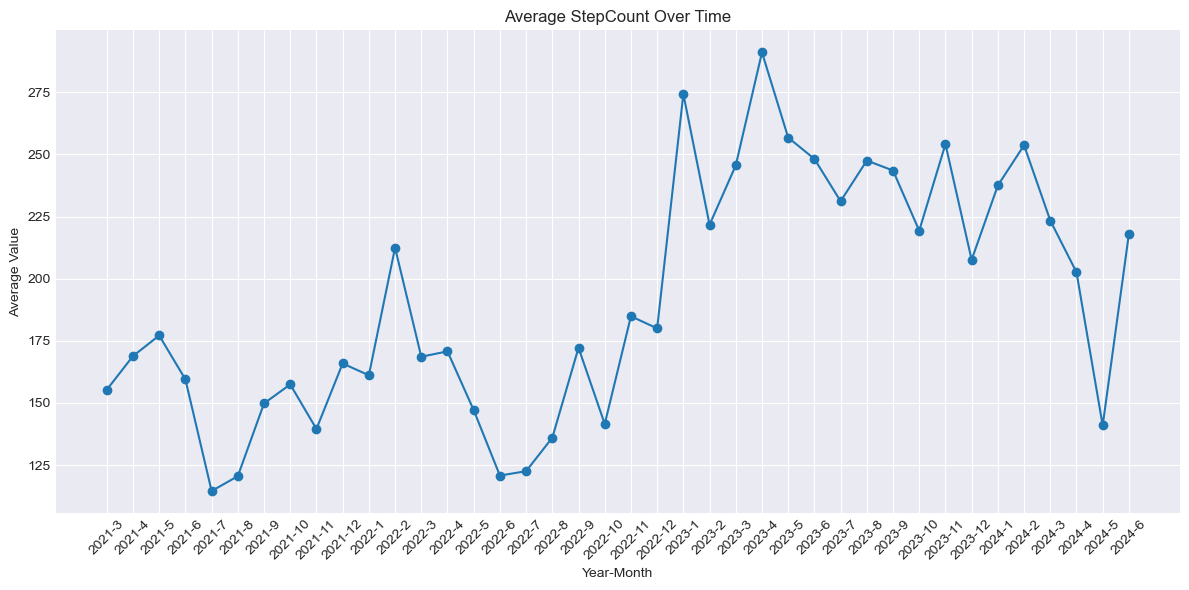

In [37]:
# Plot for StepCount
plot_measurement(data, 'StepCount')

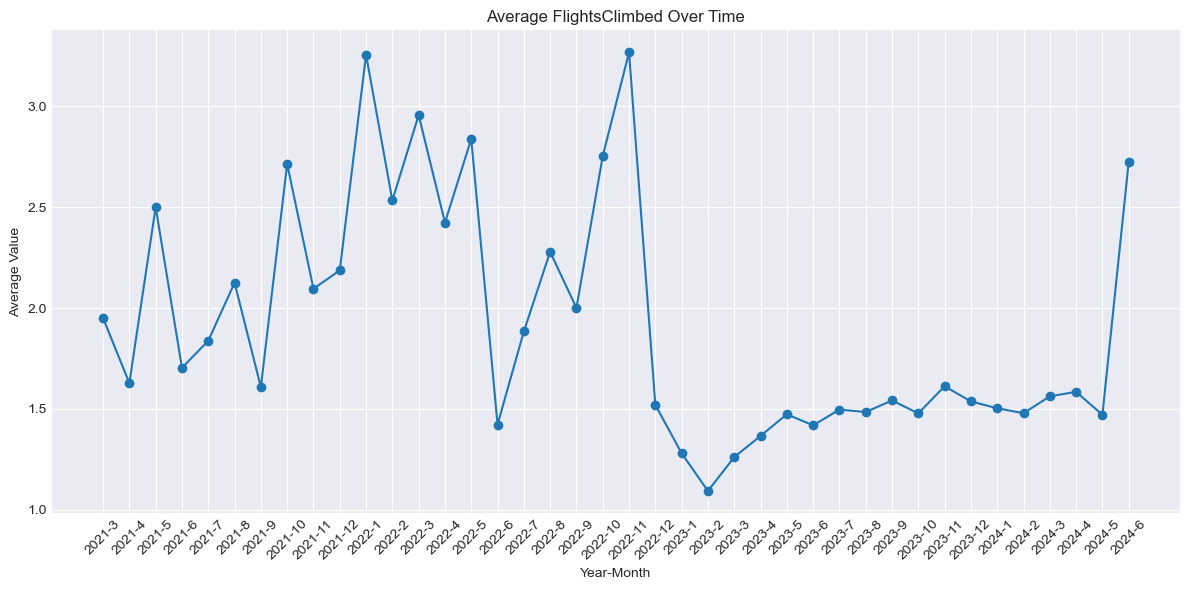

In [38]:
# Plot for FlightsClimbed
plot_measurement(data, 'FlightsClimbed')

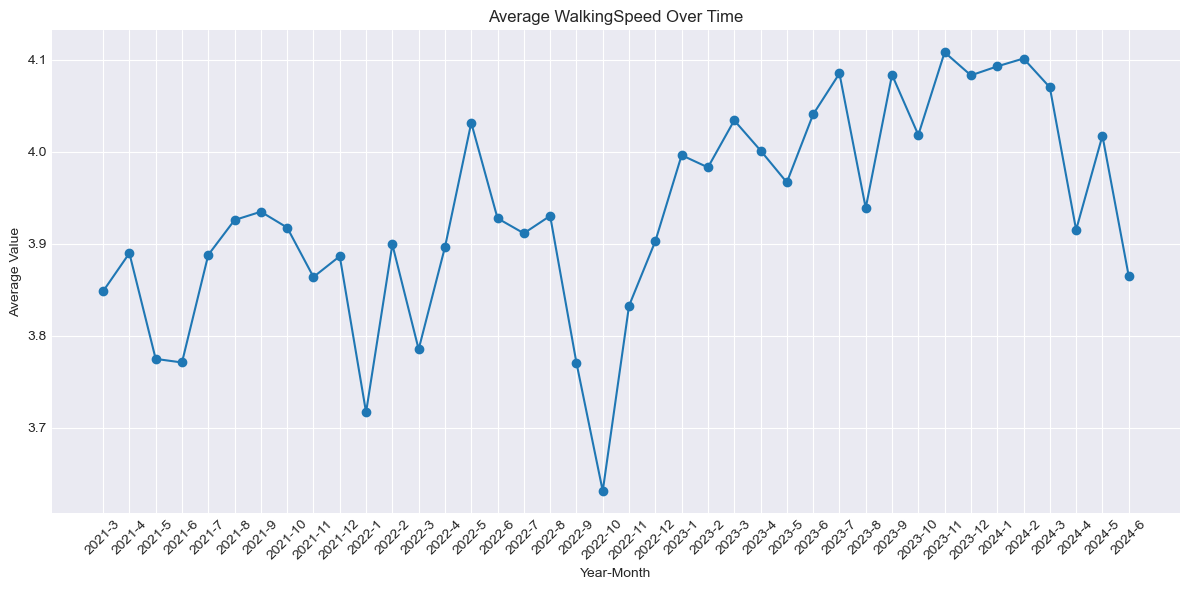

In [39]:
# Plot for WalkingSpeed
plot_measurement(data, 'WalkingSpeed')

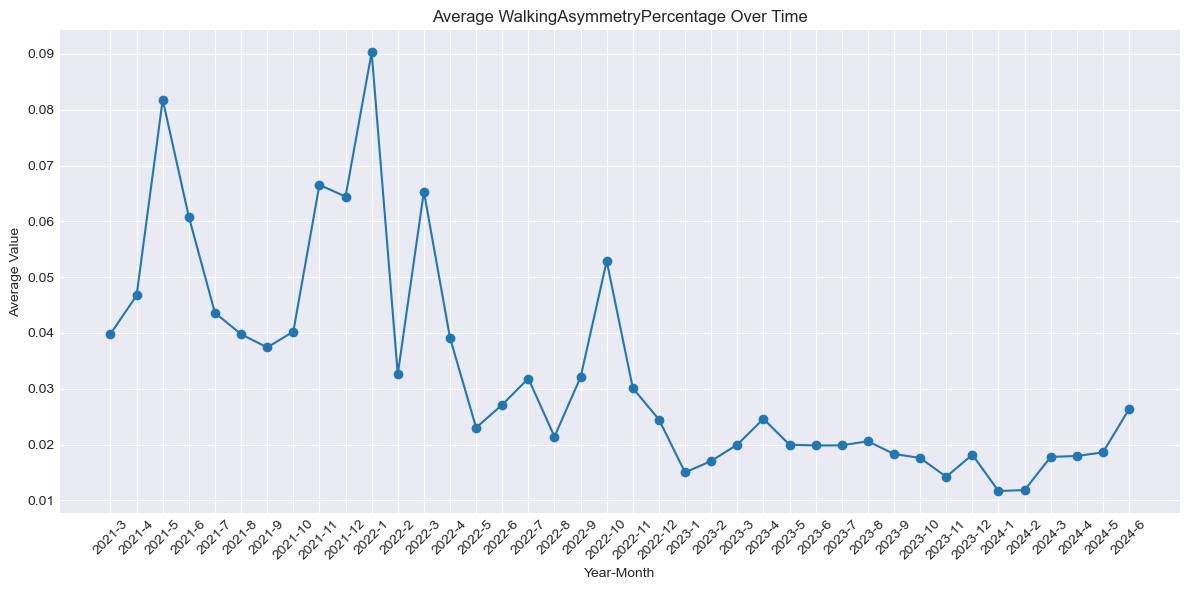

In [40]:
# Plot for WalkingAsymmetryPercentage
plot_measurement(data, 'WalkingAsymmetryPercentage')

In [41]:
# Prepare the data by pivoting the table
pivoted_data = data.pivot_table(index=['year', 'month'], columns='type', values='value').reset_index()
pivoted_data['Year-Month'] = pivoted_data['year'].astype(str) + '-' + pivoted_data['month'].astype(str)

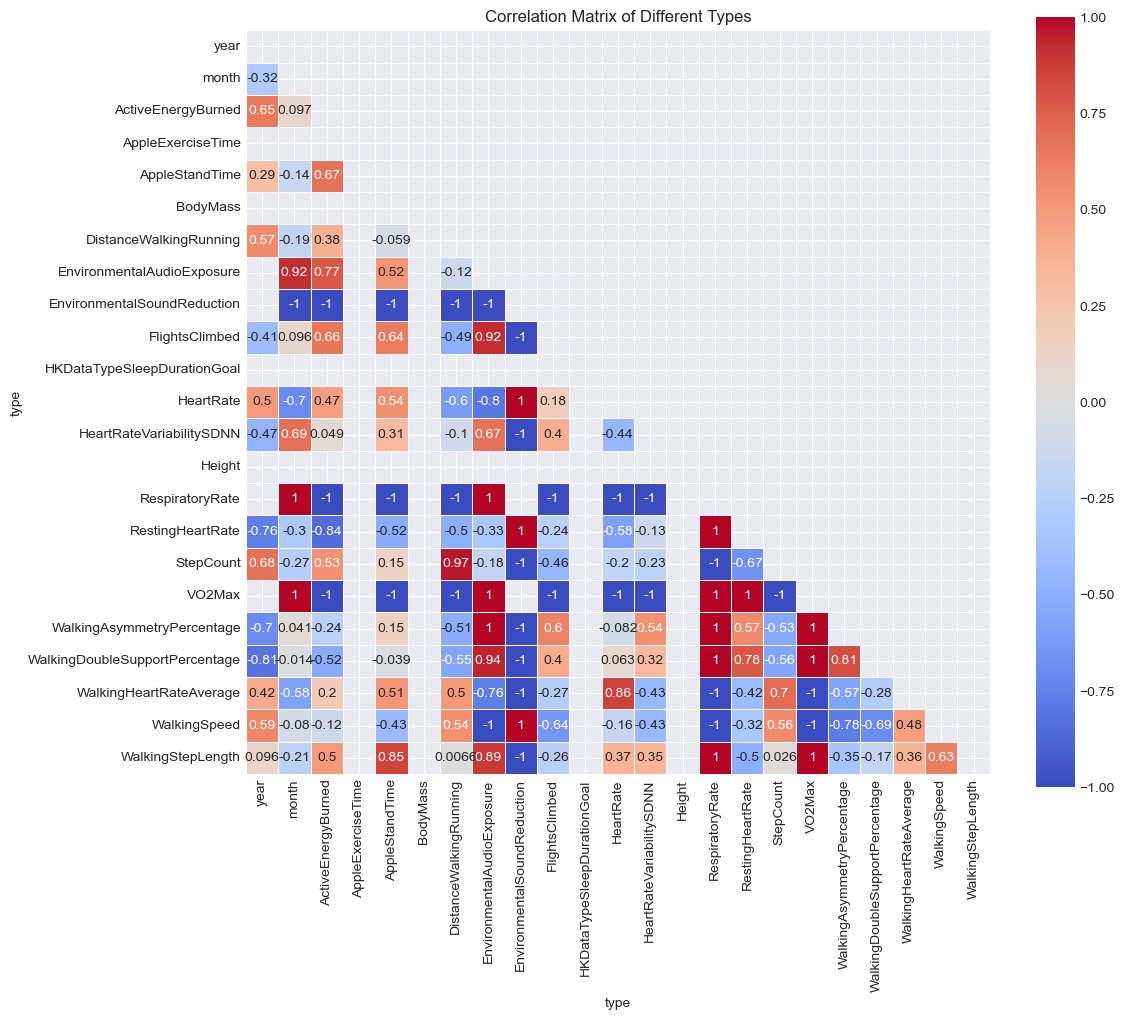

In [42]:
# Prepare the data by pivoting the table
pivoted_data = data.pivot_table(index=['year', 'month'], columns='type', values='value').reset_index()

# Calculate the correlation matrix
correlation_matrix = pivoted_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True, linewidths=.5)

plt.title('Correlation Matrix of Different Types')
plt.show()

In [44]:
# Get the unique years present in the dataset
years_to_analyze = data['year'].unique()

# Get unique types of measurements
types = data['type'].unique()



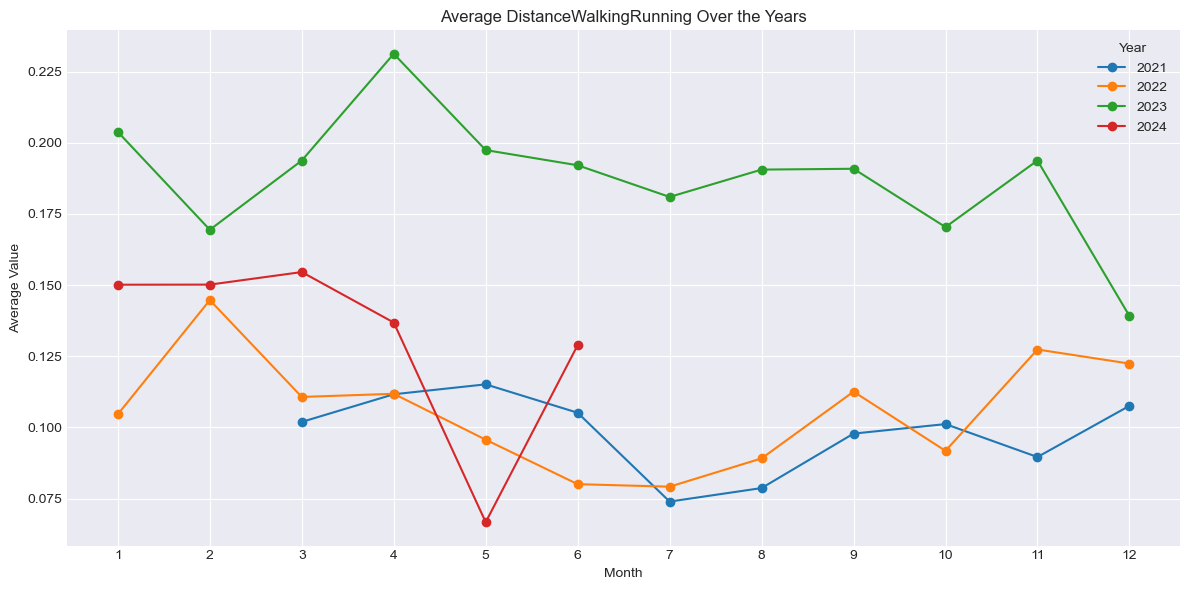

In [45]:
# Plot for Distance Walking/Running
measurement_type = 'DistanceWalkingRunning'
subset = data[data['type'] == measurement_type]
plt.figure(figsize=(12, 6))
for year in years_to_analyze:
    year_subset = subset[subset['year'] == year]
    plt.plot(year_subset['month'], year_subset['value'], marker='o', label=f'{year}')

plt.title(f'Average {measurement_type} Over the Years')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

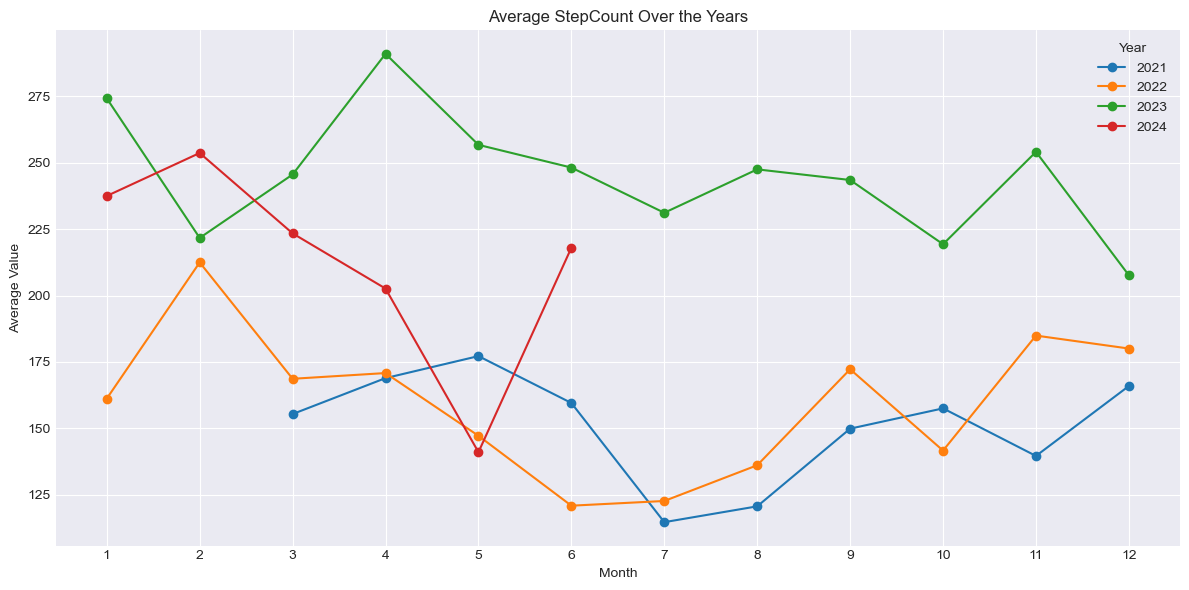

In [46]:
# Plot for Step Count
measurement_type = 'StepCount'
subset = data[data['type'] == measurement_type]
plt.figure(figsize=(12, 6))
for year in years_to_analyze:
    year_subset = subset[subset['year'] == year]
    plt.plot(year_subset['month'], year_subset['value'], marker='o', label=f'{year}')

plt.title(f'Average {measurement_type} Over the Years')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

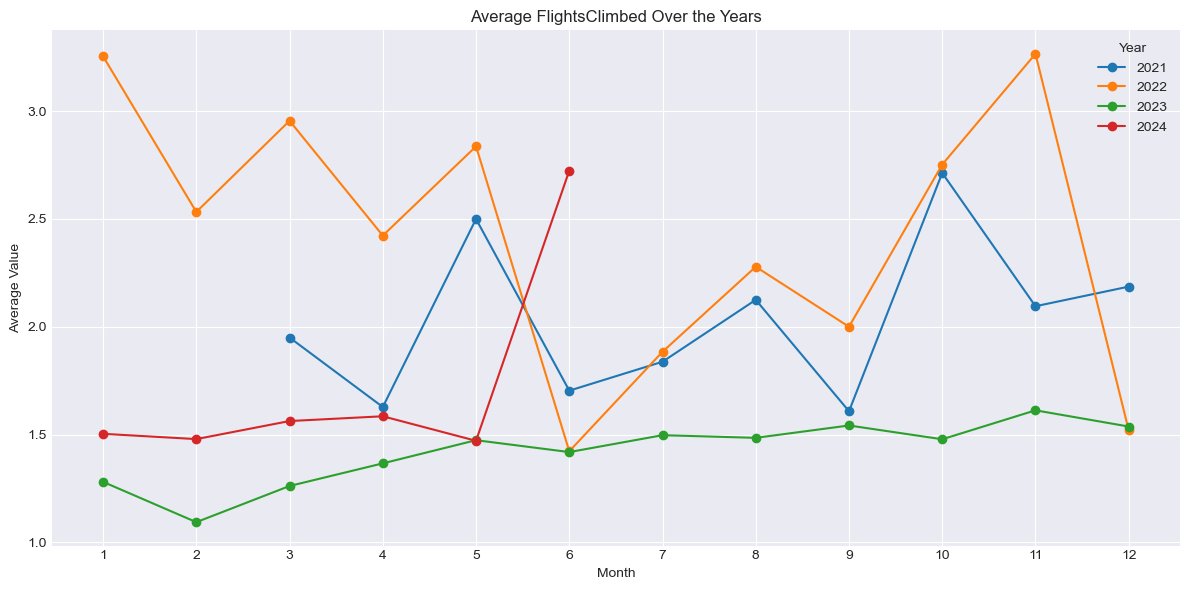

In [47]:
# Plot for Flights Climbed
measurement_type = 'FlightsClimbed'
subset = data[data['type'] == measurement_type]
plt.figure(figsize=(12, 6))
for year in years_to_analyze:
    year_subset = subset[subset['year'] == year]
    plt.plot(year_subset['month'], year_subset['value'], marker='o', label=f'{year}')

plt.title(f'Average {measurement_type} Over the Years')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

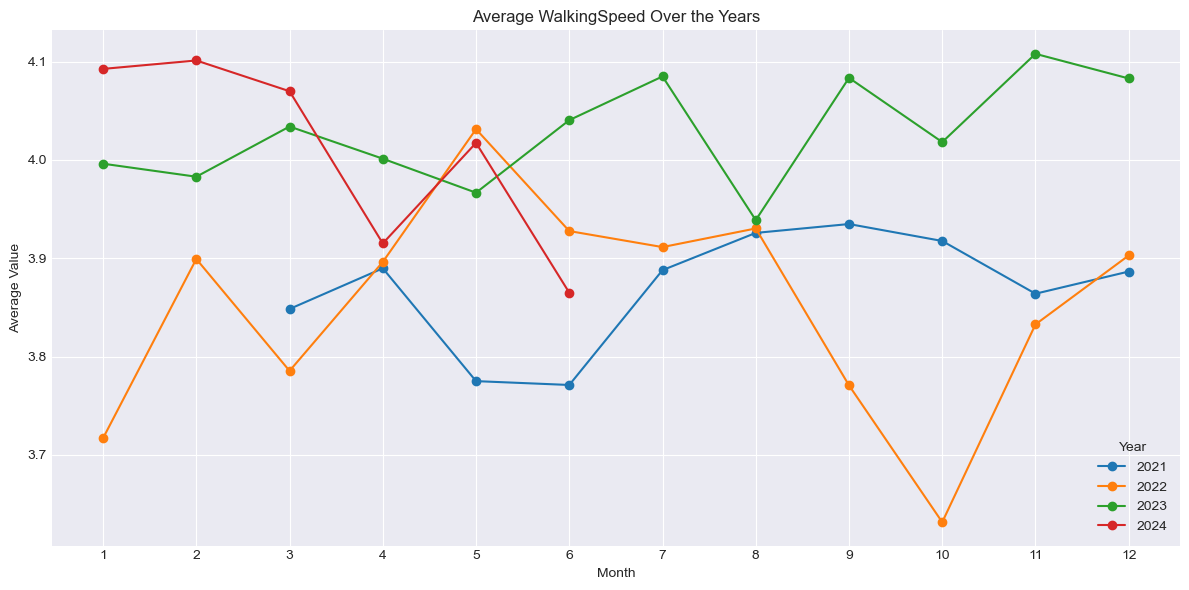

In [48]:
# Plot for Walking Speed
measurement_type = 'WalkingSpeed'
subset = data[data['type'] == measurement_type]
plt.figure(figsize=(12, 6))
for year in years_to_analyze:
    year_subset = subset[subset['year'] == year]
    plt.plot(year_subset['month'], year_subset['value'], marker='o', label=f'{year}')

plt.title(f'Average {measurement_type} Over the Years')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

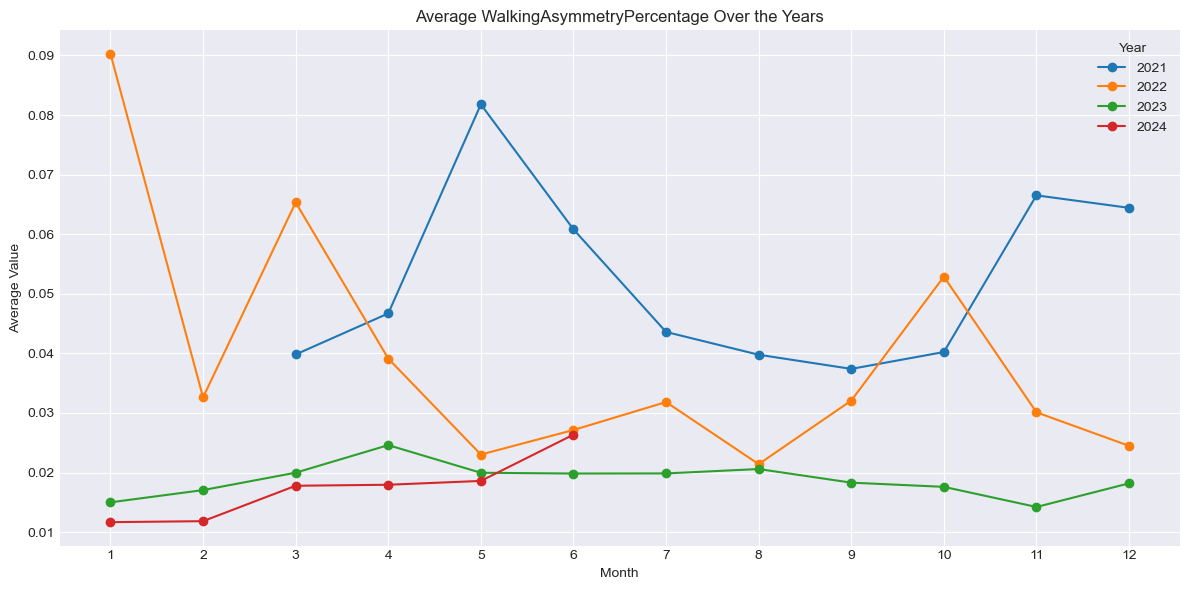

In [49]:
# Plot for Walking Asymmetry Percentage
measurement_type = 'WalkingAsymmetryPercentage'
subset = data[data['type'] == measurement_type]
plt.figure(figsize=(12, 6))
for year in years_to_analyze:
    year_subset = subset[subset['year'] == year]
    plt.plot(year_subset['month'], year_subset['value'], marker='o', label=f'{year}')

plt.title(f'Average {measurement_type} Over the Years')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [58]:
# Filter the data for WalkingSpeed
measurement_type = 'WalkingSpeed'
subset = data[data['type'] == measurement_type]

# Create a datetime index
subset['Date'] = pd.to_datetime(subset['year'].astype(str) + '-' + subset['month'].astype(str))
subset = subset.set_index('Date')

# Ensure the data is sorted by date
subset = subset.sort_index()

# Decompose the time series
result = seasonal_decompose(subset['value'], model='additive', period=12)

C:\Users\owner\AppData\Local\Temp\ipykernel_20748\3471014267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Date'] = pd.to_datetime(subset['year'].astype(str) + '-' + subset['month'].astype(str))


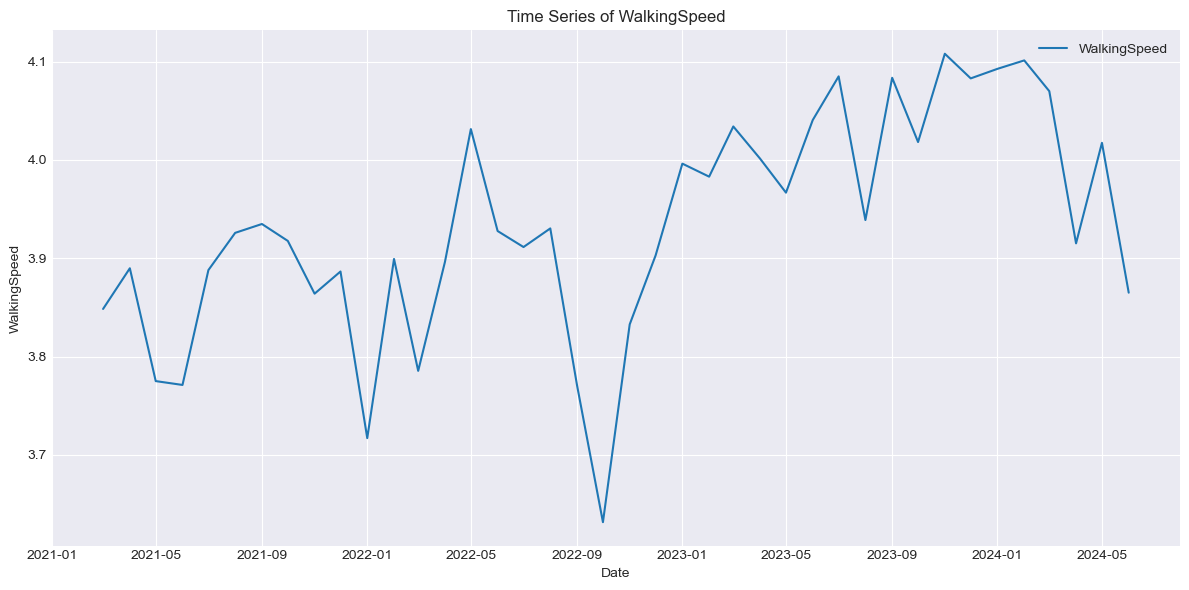

In [59]:
# Plot the raw time series data
plt.figure(figsize=(12, 6))
plt.plot(subset['value'], label='WalkingSpeed')
plt.title('Time Series of WalkingSpeed')
plt.xlabel('Date')
plt.ylabel('WalkingSpeed')
plt.legend()
plt.tight_layout()
plt.show()

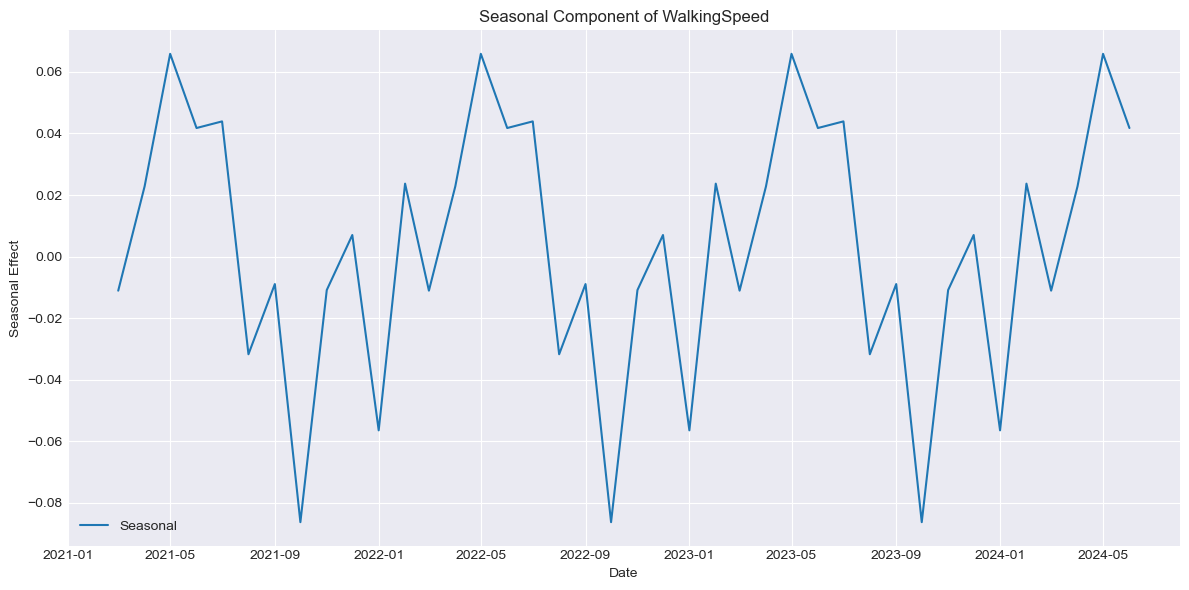

In [60]:
# Plot the seasonal component
plt.figure(figsize=(12, 6))
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component of WalkingSpeed')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend()
plt.tight_layout()
plt.show()

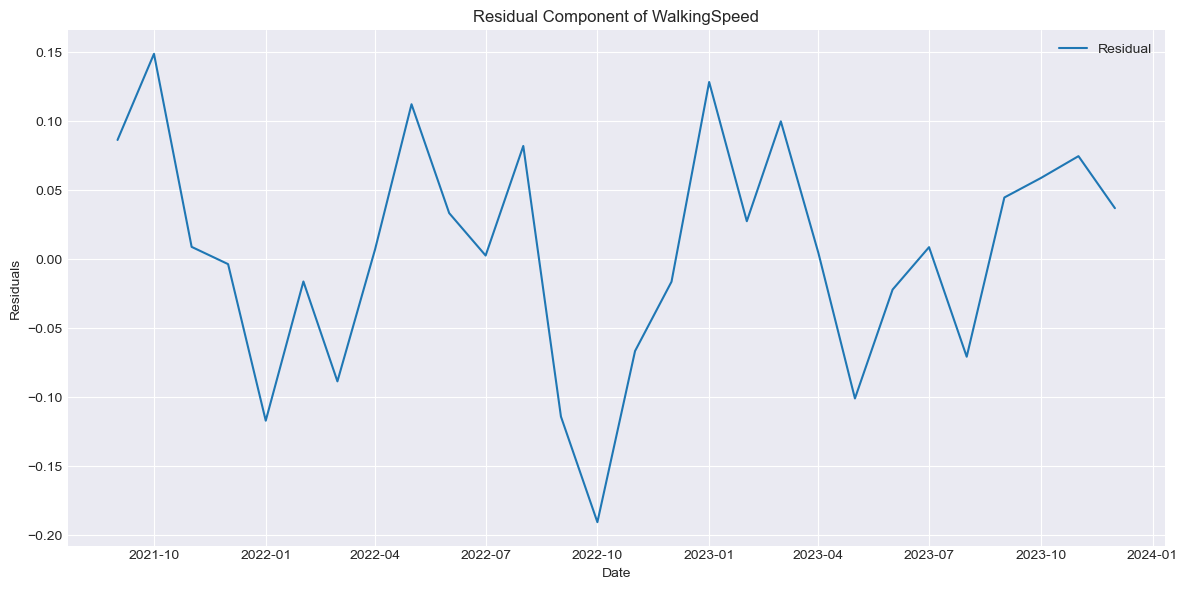

In [61]:
# Plot the residual component
plt.figure(figsize=(12, 6))
plt.plot(result.resid, label='Residual')
plt.title('Residual Component of WalkingSpeed')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

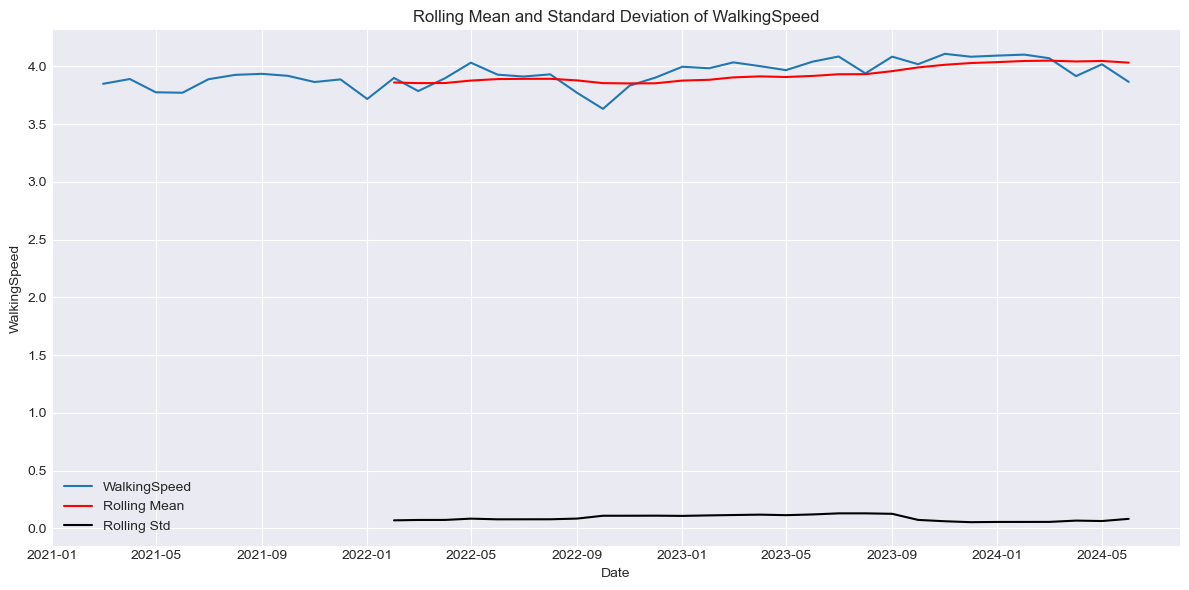

In [62]:
# Plot rolling mean and standard deviation
rolling_mean = subset['value'].rolling(window=12).mean()
rolling_std = subset['value'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(subset['value'], label='WalkingSpeed')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean and Standard Deviation of WalkingSpeed')
plt.xlabel('Date')
plt.ylabel('WalkingSpeed')
plt.legend()
plt.tight_layout()
plt.show()